# step1:
- import necessary lirary

<div style="direction:rtl">
در این گام ابتدا کتابخانه های مورد نظر را فراخوانی می کنیم. این کتابخانه ها برای پیش پردازش و تمیز کردن دیتا استفاده می شوند. همچنین ماژول های مربوط به شبکه های عصبی را فراخوانی می کنیم 
</div>

In [1]:
import pandas as pd
import numpy as np 
from hazm import *
import pandas as pd
from pandas import read_excel
import os,fnmatch,codecs
import re
import glob
import keras#     i am a 
from keras.preprocessing.sequence import pad_sequences# 1=30 2= 30
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from pandas import read_excel
import re
import sklearn.metrics as sklm
from keras import backend as K

Using TensorFlow backend.


# Step 2:
- read data

<div style="direction:rtl">
در این گام داده ها را فراخوانی می کنیم. همچنین در این گام همچنین داده ها را تمیز می کنیم. در واقع در گام تمیز کردن تمامی ایست واژه ها و علامت های غیر حروف الفبایی را حذف می کنیم. برای حذف لیست واژه ها ما از مجموعه ای شامل 2000 ایست واژه استفاده کردیم
</div>

In [2]:
my_sheet_name = 'Sheet1' 
ham = read_excel("ham.xlsx", sheet_name = my_sheet_name)
my_sheet_name = 'Sheet1' 
spam = read_excel("spam - Copy.xlsx", sheet_name = my_sheet_name)
spam = spam[spam.Body != 9178508455]
ham = ham[ham.Body != 981223827]
ham = ham[ham.Body !=9136003540]
data = spam.append(ham, ignore_index=True)
data = data.dropna(subset=['Body'])
data = data.dropna(subset=['class'])
def cleaner(text):
    clean=text
    text= re.sub(r'https?://[^ ]+', '', clean)
    emoji_pattern = u'([🤦🤗🤪🤷🤘🤣🤔🤐🤚🤢🤡])|([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])|([\U0001F1E0-\U0001F1FF])|([\U00002702-\U000027B0])|([\U000024C2-\U0001F251])'
    text=re.sub(emoji_pattern, '', text)
    return text
print ("Cleaning and parsing the text...\n")
data['Body']=data['Body'].apply(lambda x: cleaner(x))

data.Body = data.Body.apply(lambda x : re.sub('\n', ' ', x))
data.Body = data.Body.apply(lambda x : re.sub('\n', ' ', x))
data.Body= data.Body.apply(lambda x : re.sub(r"\+", "", x))
data.Body= data.Body.apply(lambda x : re.sub(r"-", "", x))
data.Body =data.Body.apply(lambda x : re.sub(r"/", " ", x))
data.Body = data.Body.apply(lambda x : re.sub(r"\\", " ", x))
data.Body =data.Body.apply(lambda x : re.sub(r"=", " ", x))
data.Body = data.Body.apply(lambda x : re.sub(r":", " ", x))
data.Body =data.Body.apply(lambda x : re.sub(r"\؟", " ", x))
data.Body = data.Body.apply(lambda x : re.sub(r"!", " ", x))
data.Body = data.Body.apply(lambda x : re.sub(r"&", " ", x))
data.Body = data.Body.apply(lambda x : re.sub(r"\|", " ", x))
data.Body = data.Body.apply(lambda x : re.sub(r";", " ", x))
data.Body = data.Body.apply(lambda x : re.sub(r"\(", " ", x))
data.Body =data.Body.apply(lambda x : re.sub(r"۰", "", x))
data.Body = data.Body.apply(lambda x : re.sub(r"۹", "", x))
data.Body= data.Body.apply(lambda x : re.sub(r"۸", "", x))
data.Body = data.Body.apply(lambda x : re.sub(r"۷", "", x))
data.Body = data.Body.apply(lambda x : re.sub(r"۶", "", x))
data.Body = data.Body.apply(lambda x : re.sub(r"۵", "", x))
data.Body = data.Body.apply(lambda x : re.sub(r"۴", "", x))
data.Body = data.Body.apply(lambda x : re.sub(r"۳", "", x))
data.Body = data.Body.apply(lambda x : re.sub(r"۲", "", x))
data.Body = data.Body.apply(lambda x : re.sub(r"۱", "", x))
data.Body =data.Body.apply(lambda x : re.sub(r'[0-9]','', x))
data.Body = data.Body.apply(lambda x : re.sub(r'[A-Z]','', x))
data.Body= data.Body.apply(lambda x : re.sub(r'[a-z]','', x))
data.Body = data.Body.apply(lambda x : re.sub(r"\)", " ", x))
data.Body = data.Body.apply(lambda x : re.sub(r"#", "", x))
data.Body = data.Body.apply(lambda x : re.sub(r"%", " ", x))
stemmer = Stemmer()
data['Body']=data['Body'].apply(lambda x: stemmer.stem(x))
normalizer = Normalizer()
data['Body']=data['Body'].apply(lambda x:  normalizer.normalize(x))  
import codecs
from hazm import Normalizer
nmz = Normalizer()
stops = sorted(
        list(
            set(
                [
                    nmz.normalize(w) for w in codecs.open('persian', encoding='utf-8').read().split('\n') if w
                ]
            )
        )
    )
print (type(stops))
data['Body']= [' '.join([w for w in x.split() if w not in stops]) for x in data['Body'].tolist()]

Cleaning and parsing the text...

<class 'list'>


In [7]:
data = shuffle(data)
data.head(5)

,Body,class
2000,لحظه شبانه سوال درخواست بررسی,spam
7756,سلام عزیزم فدات اشکال نداره میگم آذر گارکاه می...,ham
526,شناسه دستگاه جزء شناسه‌های قانونی ثبت مشخصات د...,spam
987,تاریخ تعداد تماس داشته‌اید. تبریک میتونی امروز...,spam
2075,«ویلایی‌ها» نگاهی متفاوت دفاع مقدس هنرنمایی پر...,spam


----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

<div style="direction:rtl">
برای ارزیابی یک مدل نیاز به معیار های ارزیابی داریم این معیار ها در زیر آمده 
</div>

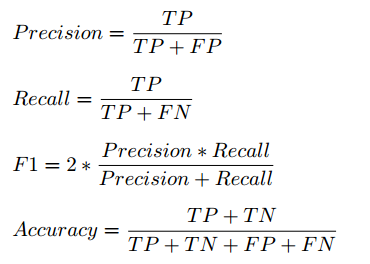

In [8]:
def mcor(y_true, y_pred):# فرمول ماکرو را مطالعه کنید
    #matthews_correlation
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos
    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos
    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)
    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)
    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return numerator / (denominator + K.epsilon())
def precision(y_true, y_pred):# محاسبه ی پرسیژن
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):# محاسبه ریکال
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def f1(y_true, y_pred):# محاسبه ی اف وان
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
    def precision(y_true, y_pred):

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall))
print("Done!")

Done!


<div style="direction:rtl">
همچنین برای ارزیابی می توان از ماتریس های درهم ریختگی استفاده کرد این ماتریس ها میزان صحت 
طبقه بند را مشخص می کند
</div>

In [9]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


# step 2-1:
- zero padding

<div style="direction:rtl">
توکن بندی متن ورودی و پدینگ آن به بزرگترین طول جمله موجود در دیتاست. 
    علت این کار این است که در هنگام کار کردن با شبکه های عصبی باید اندازه تمامی ورودی ها با هم برابر باشد
</div>

In [10]:
l=data.Body.map(lambda x: len(x))

In [11]:

tokenizer = Tokenizer()# tokenier

tokenizer.fit_on_texts(data['Body'].values)# tokenier ra 1 bar 2 roy 3 matn eamal mikonim
num_words = len(tokenizer.word_index) + 1
X = tokenizer.texts_to_sequences(data['Body'].values)# kalamat token shode ra be donbale tabdil mikonad
X = pad_sequences(X,200)

# step 2-2:
- refine labels

<div style="direction:rtl">
برای این که بتوان با برچسب داده ها کار کرد آن ها را به ۱ و 0 نگاشت می کنیم. که 1 نشان دهنده هم و 0 نشان دهنده اسپم می باشد 
</div>

In [12]:
import math
rank_new=[]
for index, row in data.iterrows():
    if row['class']=='ham':
        rank_new.append(1)
    else:
        rank_new.append(0)
data['class'] = rank_new

# Step 3: classification methods
# step 3-1: Random Forest 
- 10-fold cross validation

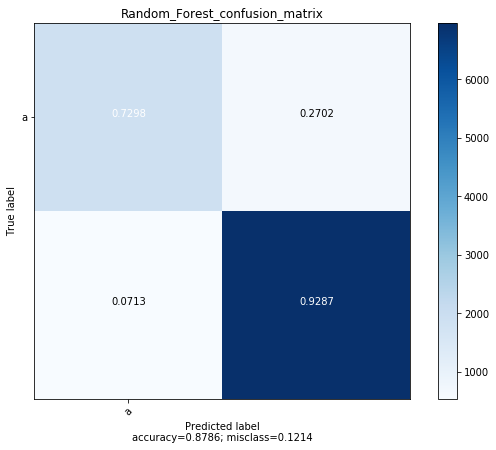

Random Forest accuracy after 10 fold CV: 0.88 (+/- 0.02), 3s
Random Forest precision after 10 fold CV: 0.91 (+/- 0.02), 3s
Random Forest recall after 10 fold CV: 0.93 (+/- 0.02), 3s
Random Forest f1 after 10 fold CV: 0.92 (+/- 0.01), 3s


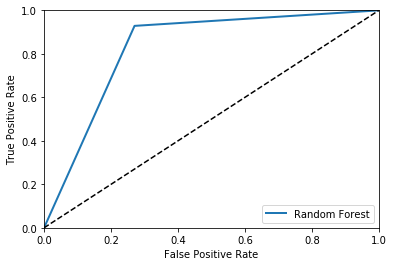

Area under the ROC curve : 0.829226
------------------------------------------------------------


In [16]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
Y = data['class'].values
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
#cv = ShuffleSplit(n_splits=10, test_size=0.1)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(classifier, X, Y, cv=10)
cm = confusion_matrix(Y, y_pred)
plot_confusion_matrix(cm,
                          target_names='a',
                          title='Random_Forest_confusion_matrix',
                          cmap=None,
                          normalize=True)
result_accuracy = cross_val_score(classifier, X, Y, scoring='accuracy', cv=10)
result_precision = cross_val_score(classifier, X, Y, scoring='precision', cv=10)
result_recall = cross_val_score(classifier, X, Y, scoring='recall', cv=10)
result_f1 = cross_val_score(classifier, X, Y, scoring='f1', cv=10)
print("Random Forest accuracy after 10 fold CV: %0.2f (+/- %0.2f)" % (result_accuracy.mean(), result_accuracy.std() * 2) + ", " + str(3) + "s")
print("Random Forest precision after 10 fold CV: %0.2f (+/- %0.2f)" % (result_precision.mean(), result_precision.std() * 2) + ", " + str(3) + "s")
print("Random Forest recall after 10 fold CV: %0.2f (+/- %0.2f)" % (result_recall.mean(), result_recall.std() * 2) + ", " + str(3) + "s")
print("Random Forest f1 after 10 fold CV: %0.2f (+/- %0.2f)" % (result_f1.mean(), result_f1.std() * 2) + ", " + str(3) + "s")

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Y, y_pred)
roc_auc = auc(fpr, tpr)

plot_roc_curve(fpr, tpr, "Random Forest")
plt.legend(loc="lower right")
plt.show()
print ("Area under the ROC curve : %f" % roc_auc)
print("-"*60)

# step 3-2: SVM 
- 10-fold cross validation

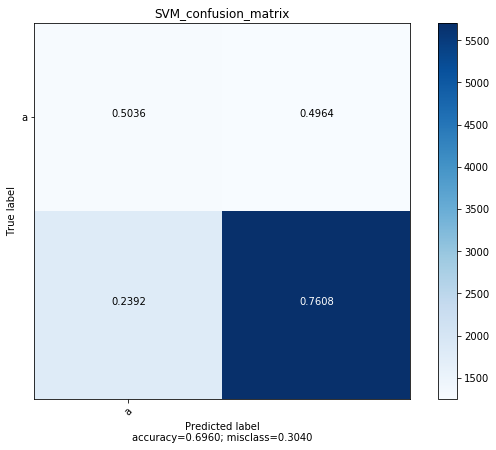

 SVM accuracy after 10 fold CV: 0.71 (+/- 0.06), 3s
 SVM precision after 10 fold CV: 0.81 (+/- 0.05), 3s
 SVM recall after 10 fold CV: 0.78 (+/- 0.21), 3s
 SVM f1 after 10 fold CV: 0.81 (+/- 0.08), 3s


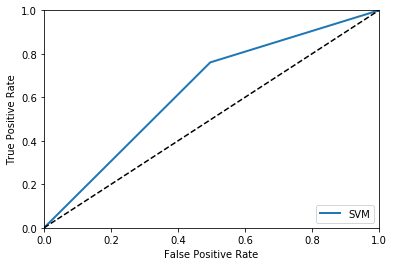

Area under the ROC curve : 0.632167
------------------------------------------------------------


In [17]:
from sklearn import svm
from sklearn.svm import LinearSVC
classifier = LinearSVC()
start = time.time()
result_accuracy = cross_val_score(classifier, X, Y, scoring='accuracy', cv=10)
result_precision = cross_val_score(classifier, X, Y, scoring='precision', cv=10)
result_recall = cross_val_score(classifier, X, Y, scoring='recall', cv=10)
result_f1 = cross_val_score(classifier, X, Y, scoring='f1', cv=10)
y_pred = cross_val_predict(classifier, X, Y, cv=10)
cm = confusion_matrix(Y, y_pred)
plot_confusion_matrix(cm,
                          target_names='a',
                          title='SVM_confusion_matrix',
                          cmap=None,
                          normalize=True)

print(" SVM accuracy after 10 fold CV: %0.2f (+/- %0.2f)" % (result_accuracy.mean(), result_accuracy.std() * 2) + ", " + str(3) + "s")

print(" SVM precision after 10 fold CV: %0.2f (+/- %0.2f)" % (result_precision.mean(), result_precision.std() * 2) + ", " + str(3) + "s")

print(" SVM recall after 10 fold CV: %0.2f (+/- %0.2f)" % (result_recall.mean(), result_recall.std() * 2) + ", " + str(3) + "s")

print(" SVM f1 after 10 fold CV: %0.2f (+/- %0.2f)" % (result_f1.mean(), result_f1.std() * 2) + ", " + str(3) + "s")
fpr, tpr, thresholds = roc_curve(Y, y_pred)
roc_auc = auc(fpr, tpr)

plot_roc_curve(fpr, tpr, "SVM")
plt.legend(loc="lower right")
plt.show()
print ("Area under the ROC curve : %f" % roc_auc)
print("-"*60)


# step 3-3: Decision Tree 
- 10-fold cross validation

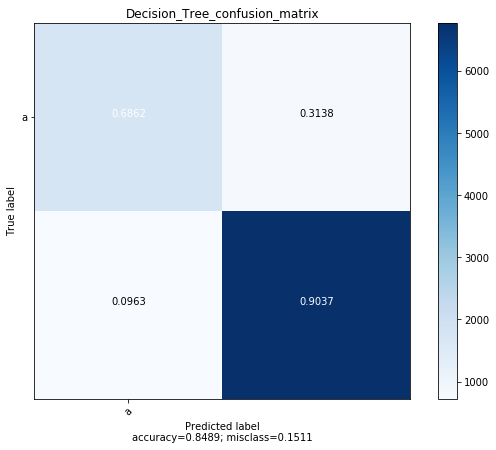

 Decision Tree accuracy after 10 fold CV: 0.85 (+/- 0.02), 3s
 Decision Tree precision after 10 fold CV: 0.90 (+/- 0.01), 3s
 Decision Tree recall after 10 fold CV: 0.90 (+/- 0.03), 3s
 Decision Tree f1 after 10 fold CV: 0.90 (+/- 0.02), 3s


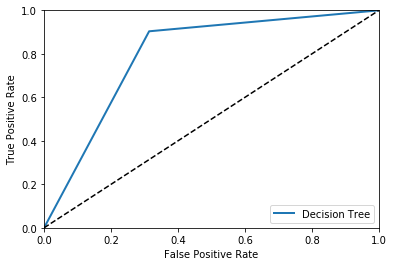

Area under the ROC curve : 0.794966
------------------------------------------------------------


In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
result_accuracy = cross_val_score(classifier, X, Y, scoring='accuracy', cv=10)
result_precision = cross_val_score(classifier, X, Y, scoring='precision', cv=10)
result_recall = cross_val_score(classifier, X, Y, scoring='recall', cv=10)
result_f1 = cross_val_score(classifier, X, Y, scoring='f1', cv=10)
y_pred = cross_val_predict(classifier, X, Y, cv=10)
cm = confusion_matrix(Y, y_pred)
plot_confusion_matrix(cm,
                          target_names='a',
                          title='Decision_Tree_confusion_matrix',
                          cmap=None,
                          normalize=True)

print(" Decision Tree accuracy after 10 fold CV: %0.2f (+/- %0.2f)" % (result_accuracy.mean(), result_accuracy.std() * 2) + ", " + str(3) + "s")

print(" Decision Tree precision after 10 fold CV: %0.2f (+/- %0.2f)" % (result_precision.mean(), result_precision.std() * 2) + ", " + str(3) + "s")

print(" Decision Tree recall after 10 fold CV: %0.2f (+/- %0.2f)" % (result_recall.mean(), result_recall.std() * 2) + ", " + str(3) + "s")

print(" Decision Tree f1 after 10 fold CV: %0.2f (+/- %0.2f)" % (result_f1.mean(), result_f1.std() * 2) + ", " + str(3) + "s")
fpr, tpr, thresholds = roc_curve(Y, y_pred)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, "Decision Tree")
plt.legend(loc="lower right")
plt.show()
print ("Area under the ROC curve : %f" % roc_auc)
print("-"*60)

# step 3-4: Naive Bayes 
- 10-fold cross validation

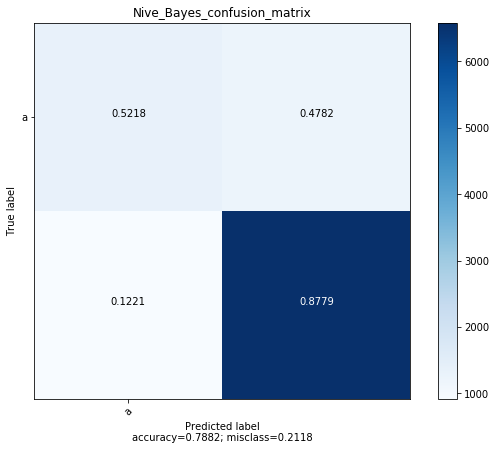

 Nive Bayes accuracy after 10 fold CV: 0.79 (+/- 0.02), 3s
 Nive Bayes precision after 10 fold CV: 0.85 (+/- 0.02), 3s
 Nive Bayes recall after 10 fold CV: 0.88 (+/- 0.02), 3s
 Nive Bayes f1 after 10 fold CV: 0.86 (+/- 0.01), 3s


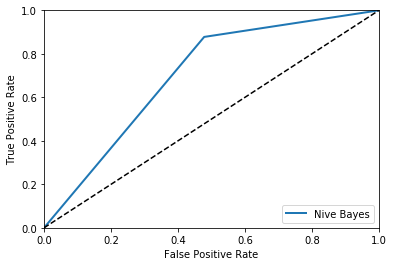

Area under the ROC curve : 0.699821
------------------------------------------------------------


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  MultinomialNB
classifier = MultinomialNB()
classifier.fit(X, Y)
y_pred = classifier.predict(X)
result_accuracy = cross_val_score(classifier, X, Y, scoring='accuracy', cv=10)
result_precision = cross_val_score(classifier, X, Y, scoring='precision', cv=10)
result_recall = cross_val_score(classifier, X, Y, scoring='recall', cv=10)
result_f1 = cross_val_score(classifier, X, Y, scoring='f1', cv=10)
y_pred = cross_val_predict(classifier, X, Y, cv=10)
cm = confusion_matrix(Y, y_pred)
plot_confusion_matrix(cm,
                          target_names='a',
                          title='Nive_Bayes_confusion_matrix',
                          cmap=None,
                          normalize=True)

print(" Nive Bayes accuracy after 10 fold CV: %0.2f (+/- %0.2f)" % (result_accuracy.mean(), result_accuracy.std() * 2) + ", " + str(3) + "s")

print(" Nive Bayes precision after 10 fold CV: %0.2f (+/- %0.2f)" % (result_precision.mean(), result_precision.std() * 2) + ", " + str(3) + "s")

print(" Nive Bayes recall after 10 fold CV: %0.2f (+/- %0.2f)" % (result_recall.mean(), result_recall.std() * 2) + ", " + str(3) + "s")

print(" Nive Bayes f1 after 10 fold CV: %0.2f (+/- %0.2f)" % (result_f1.mean(), result_f1.std() * 2) + ", " + str(3) + "s")
fpr, tpr, thresholds = roc_curve(Y, y_pred)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, "Nive Bayes")
plt.legend(loc="lower right")
plt.show()
print ("Area under the ROC curve : %f" % roc_auc)
print("-"*60)

# step 3-5: K Neighbors 
- k=3
- 10-fold cross validation

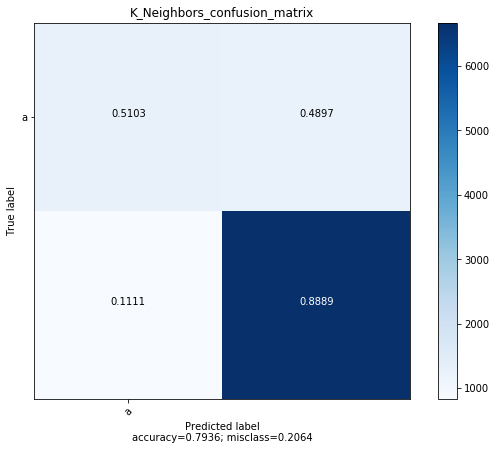

 K Neighbors k=3 accuracy after 10 fold CV: 0.79 (+/- 0.02), 3s
 K Neighbors k=3 precision after 10 fold CV: 0.84 (+/- 0.01), 3s
 K Neighbors k=3 recall after 10 fold CV: 0.89 (+/- 0.03), 3s
 K Neighbors k=3 f1 after 10 fold CV: 0.87 (+/- 0.02), 3s


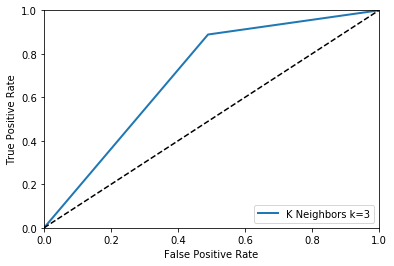

Area under the ROC curve : 0.699610
------------------------------------------------------------
------------------------------------------------------------


In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

result_accuracy = cross_val_score(classifier, X, Y, scoring='accuracy', cv=10)
result_precision = cross_val_score(classifier, X, Y, scoring='precision', cv=10)
result_recall = cross_val_score(classifier, X, Y, scoring='recall', cv=10)
result_f1 = cross_val_score(classifier, X, Y, scoring='f1', cv=10)
y_pred = cross_val_predict(classifier, X, Y, cv=10)
cm = confusion_matrix(Y, y_pred)
plot_confusion_matrix(cm,
                          target_names='a',
                          title='K_Neighbors_confusion_matrix',
                          cmap=None,
                          normalize=True)

print(" K Neighbors k=3 accuracy after 10 fold CV: %0.2f (+/- %0.2f)" % (result_accuracy.mean(), result_accuracy.std() * 2) + ", " + str(3) + "s")

print(" K Neighbors k=3 precision after 10 fold CV: %0.2f (+/- %0.2f)" % (result_precision.mean(), result_precision.std() * 2) + ", " + str(3) + "s")

print(" K Neighbors k=3 recall after 10 fold CV: %0.2f (+/- %0.2f)" % (result_recall.mean(), result_recall.std() * 2) + ", " + str(3) + "s")

print(" K Neighbors k=3 f1 after 10 fold CV: %0.2f (+/- %0.2f)" % (result_f1.mean(), result_f1.std() * 2) + ", " + str(3) + "s")
fpr, tpr, thresholds = roc_curve(Y, y_pred)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, "K Neighbors k=3")
plt.legend(loc="lower right")
plt.show()
print ("Area under the ROC curve : %f" % roc_auc)

print("-"*60)

# step 3-5-1: K Neighbors 
- k=5
- 10-fold cross validation

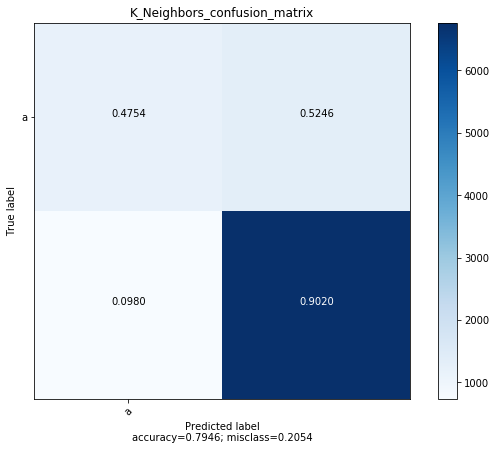

 K Neighbors k=5 accuracy after 10 fold CV: 0.79 (+/- 0.02), 3s
 K Neighbors k=5 precision after 10 fold CV: 0.84 (+/- 0.02), 3s
 K Neighbors k=5 recall after 10 fold CV: 0.90 (+/- 0.03), 3s
 K Neighbors k=5 f1 after 10 fold CV: 0.87 (+/- 0.01), 3s


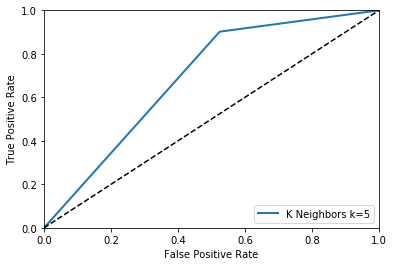

Area under the ROC curve : 0.688711
------------------------------------------------------------


In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
result_accuracy = cross_val_score(classifier, X, Y, scoring='accuracy', cv=10)
result_precision = cross_val_score(classifier, X, Y, scoring='precision', cv=10)
result_recall = cross_val_score(classifier, X, Y, scoring='recall', cv=10)
result_f1 = cross_val_score(classifier, X, Y, scoring='f1', cv=10)
y_pred = cross_val_predict(classifier, X, Y, cv=10)
cm = confusion_matrix(Y, y_pred)
plot_confusion_matrix(cm,
                          target_names='a',
                          title='K_Neighbors_confusion_matrix',
                          cmap=None,
                          normalize=True)

print(" K Neighbors k=5 accuracy after 10 fold CV: %0.2f (+/- %0.2f)" % (result_accuracy.mean(), result_accuracy.std() * 2) + ", " + str(3) + "s")

print(" K Neighbors k=5 precision after 10 fold CV: %0.2f (+/- %0.2f)" % (result_precision.mean(), result_precision.std() * 2) + ", " + str(3) + "s")

print(" K Neighbors k=5 recall after 10 fold CV: %0.2f (+/- %0.2f)" % (result_recall.mean(), result_recall.std() * 2) + ", " + str(3) + "s")

print(" K Neighbors k=5 f1 after 10 fold CV: %0.2f (+/- %0.2f)" % (result_f1.mean(), result_f1.std() * 2) + ", " + str(3) + "s")
fpr, tpr, thresholds = roc_curve(Y, y_pred)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, "K Neighbors k=5")
plt.legend(loc="lower right")
plt.show()
print ("Area under the ROC curve : %f" % roc_auc)

print("-"*60)

# step 3-5-3: K Neighbors 
- k=7
- 10-fold cross validation

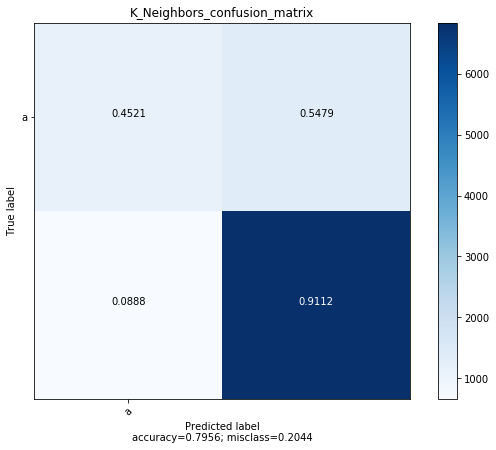

 K Neighbors k=7 accuracy after 10 fold CV: 0.80 (+/- 0.01), 3s
 K Neighbors k=7 precision after 10 fold CV: 0.83 (+/- 0.01), 3s
 K Neighbors k=7 recall after 10 fold CV: 0.91 (+/- 0.02), 3s
 K Neighbors k=7 f1 after 10 fold CV: 0.87 (+/- 0.01), 3s


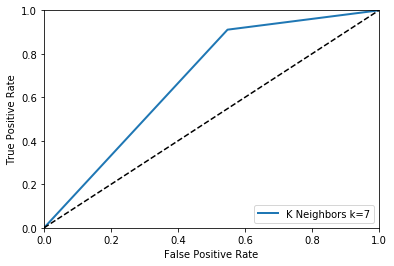

Area under the ROC curve : 0.681624
------------------------------------------------------------


In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
result_accuracy = cross_val_score(classifier, X, Y, scoring='accuracy', cv=10)
result_precision = cross_val_score(classifier, X, Y, scoring='precision', cv=10)
result_recall = cross_val_score(classifier, X, Y, scoring='recall', cv=10)
result_f1 = cross_val_score(classifier, X, Y, scoring='f1', cv=10)
y_pred = cross_val_predict(classifier, X, Y, cv=10)
cm = confusion_matrix(Y, y_pred)
plot_confusion_matrix(cm,
                          target_names='a',
                          title='K_Neighbors_confusion_matrix',
                          cmap=None,
                          normalize=True)

print(" K Neighbors k=7 accuracy after 10 fold CV: %0.2f (+/- %0.2f)" % (result_accuracy.mean(), result_accuracy.std() * 2) + ", " + str(3) + "s")

print(" K Neighbors k=7 precision after 10 fold CV: %0.2f (+/- %0.2f)" % (result_precision.mean(), result_precision.std() * 2) + ", " + str(3) + "s")

print(" K Neighbors k=7 recall after 10 fold CV: %0.2f (+/- %0.2f)" % (result_recall.mean(), result_recall.std() * 2) + ", " + str(3) + "s")

print(" K Neighbors k=7 f1 after 10 fold CV: %0.2f (+/- %0.2f)" % (result_f1.mean(), result_f1.std() * 2) + ", " + str(3) + "s")
fpr, tpr, thresholds = roc_curve(Y, y_pred)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, "K Neighbors k=7")
plt.legend(loc="lower right")
plt.show()
print ("Area under the ROC curve : %f" % roc_auc)
print("-"*60)

# step 6: Deep learning model 
- Long-Short term memory(LSTM)
- LSTM blok=145
- batch size=200
- epoch=50
- 10-fold cross validation

Epoch 1/5
9020/9020 [==============================] - 263s 29ms/step - loss: 0.6513 - acc: 0.6677 - precision: 0.7659 - recall: 0.8058 - f1: 0.7796
Epoch 2/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.5654 - acc: 0.7481 - precision: 0.8003 - recall: 0.8862 - f1: 0.8402
Epoch 3/5
9020/9020 [==============================] - 260s 29ms/step - loss: 0.5030 - acc: 0.7768 - precision: 0.8731 - recall: 0.8218 - f1: 0.8462
Epoch 4/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.4741 - acc: 0.7858 - precision: 0.8764 - recall: 0.8317 - f1: 0.8530
Epoch 5/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.4563 - acc: 0.7961 - precision: 0.8728 - recall: 0.8524 - f1: 0.8620


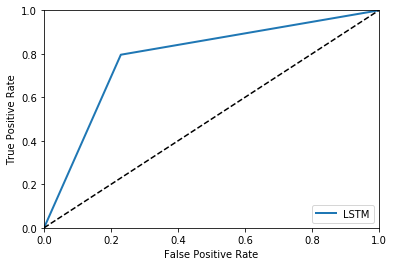

Area under the ROC curve : 0.783375
[[195  58]
 [153 597]]


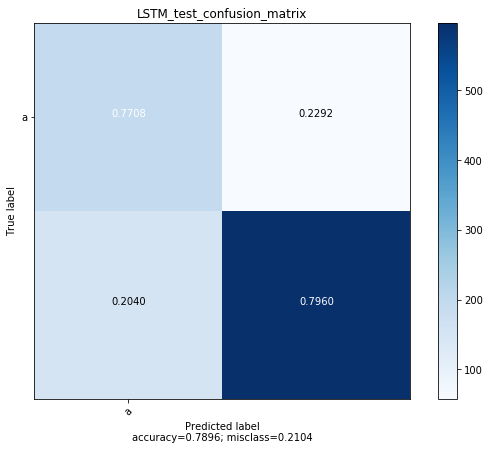

acc: 78.96%
precision: 91.36%
recall: 79.89%
f1: 84.92%
Epoch 1/5
9020/9020 [==============================] - 263s 29ms/step - loss: 0.6630 - acc: 0.6392 - precision: 0.7451 - recall: 0.7872 - f1: 0.7607
Epoch 2/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.6091 - acc: 0.7388 - precision: 0.7505 - recall: 0.9755 - f1: 0.8478
Epoch 3/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.5404 - acc: 0.7624 - precision: 0.7850 - recall: 0.9438 - f1: 0.8557
Epoch 4/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.4859 - acc: 0.7919 - precision: 0.8604 - recall: 0.8636 - f1: 0.8611
Epoch 5/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.4630 - acc: 0.7962 - precision: 0.8771 - recall: 0.8466 - f1: 0.8612


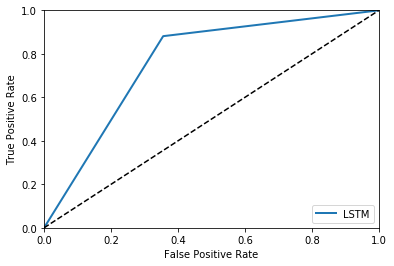

Area under the ROC curve : 0.762801
[[163  90]
 [ 89 661]]


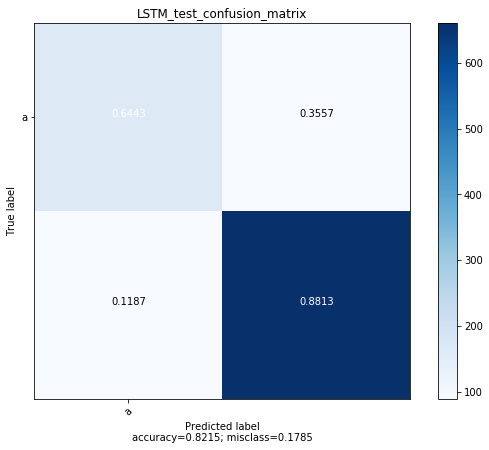

acc: 82.15%
precision: 88.06%
recall: 88.28%
f1: 87.99%
Epoch 1/5
9020/9020 [==============================] - 263s 29ms/step - loss: 0.6585 - acc: 0.6477 - precision: 0.7531 - recall: 0.7863 - f1: 0.7645
Epoch 2/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.5835 - acc: 0.7507 - precision: 0.7712 - recall: 0.9499 - f1: 0.8505
Epoch 3/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.5065 - acc: 0.7796 - precision: 0.8601 - recall: 0.8440 - f1: 0.8513
Epoch 4/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.4775 - acc: 0.7858 - precision: 0.8787 - recall: 0.8290 - f1: 0.8526
Epoch 5/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.4551 - acc: 0.7936 - precision: 0.8715 - recall: 0.8498 - f1: 0.8602


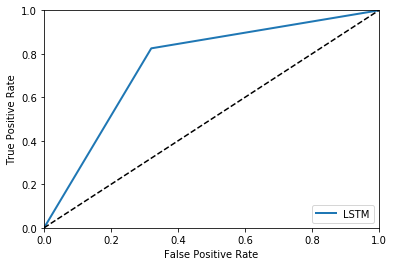

Area under the ROC curve : 0.752588
[[172  81]
 [131 619]]


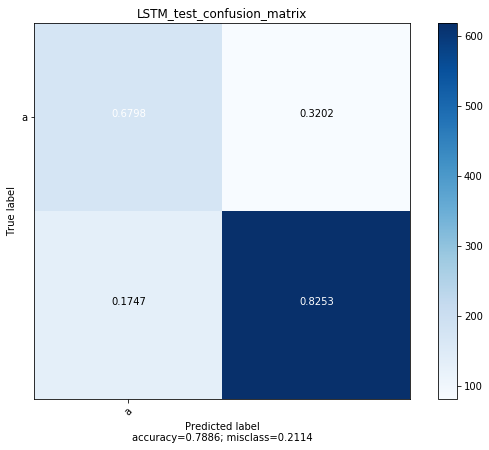

acc: 78.86%
precision: 88.35%
recall: 82.44%
f1: 85.03%
Epoch 1/5
9020/9020 [==============================] - 264s 29ms/step - loss: 0.6638 - acc: 0.6510 - precision: 0.7467 - recall: 0.8096 - f1: 0.7717
Epoch 2/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.6169 - acc: 0.7357 - precision: 0.7498 - recall: 0.9713 - f1: 0.8457
Epoch 3/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.5880 - acc: 0.7465 - precision: 0.7482 - recall: 0.9966 - f1: 0.8542
Epoch 4/5
9020/9020 [==============================] - 260s 29ms/step - loss: 0.5355 - acc: 0.7547 - precision: 0.7571 - recall: 0.9906 - f1: 0.8576
Epoch 5/5
9020/9020 [==============================] - 258s 29ms/step - loss: 0.4832 - acc: 0.7828 - precision: 0.8335 - recall: 0.8895 - f1: 0.8595


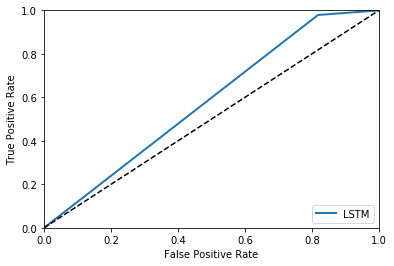

Area under the ROC curve : 0.580242
[[ 46 207]
 [ 16 734]]


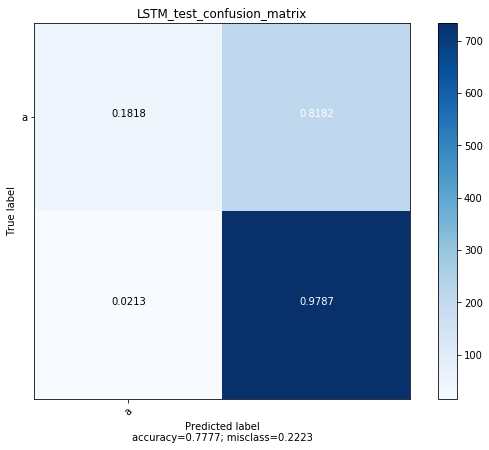

acc: 77.77%
precision: 78.02%
recall: 97.95%
f1: 86.60%
Epoch 1/5
9021/9021 [==============================] - 265s 29ms/step - loss: 0.6625 - acc: 0.6438 - precision: 0.7415 - recall: 0.7968 - f1: 0.7641
Epoch 2/5
9021/9021 [==============================] - 263s 29ms/step - loss: 0.6155 - acc: 0.7315 - precision: 0.7487 - recall: 0.9655 - f1: 0.8427
Epoch 3/5
9021/9021 [==============================] - 259s 29ms/step - loss: 0.5736 - acc: 0.7473 - precision: 0.7495 - recall: 0.9947 - f1: 0.8546
Epoch 4/5
9021/9021 [==============================] - 271s 30ms/step - loss: 0.5060 - acc: 0.7688 - precision: 0.7962 - recall: 0.9326 - f1: 0.8574
Epoch 5/5
2000/9021 [=====>........................] - ETA: 3:53 - loss: 0.4817 - acc: 0.7850 - precision: 0.8555 - recall: 0.8555 - f1: 0.8550

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
# fix random seed for reproducibility

# load pima indians dataset

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores = []
cvscores2=[]
cvscores3=[]
cvscores4=[]
    
from keras import optimizers

Y = data['class'].values
for train, test in kfold.split(X, Y):
    model = Sequential()
    model.add(Embedding(num_words,1,input_length = X.shape[1]))
    model.add(LSTM(250, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(keras.layers.BatchNormalization())
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy',precision,recall,f1])
    hist=model.fit(X[train], Y[train], epochs=5, batch_size=200, verbose=1)
    scores = model.predict(X[test])
    fpr, tpr, thresholds = roc_curve(Y[test], scores.round())
    roc_auc = auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, "LSTM")
    plt.legend(loc="lower right")
    plt.show()
    print ("Area under the ROC curve : %f" % roc_auc)
    cm = confusion_matrix(Y[test], scores.round())
    print(cm)
    plot_confusion_matrix(cm,
                          target_names='a',
                          title='LSTM_test_confusion_matrix',
                          cmap=None,
                          normalize=True)
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
    print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
    print("%s: %.2f%%" % (model.metrics_names[4], scores[4]*100))
    cvscores.append(scores[1] * 100)
    cvscores2.append(scores[2] * 100)
    cvscores3.append(scores[3] * 100)
    cvscores4.append(scores[4] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores2), numpy.std(cvscores2)))
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores3), numpy.std(cvscores3)))
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores4), numpy.std(cvscores4)))

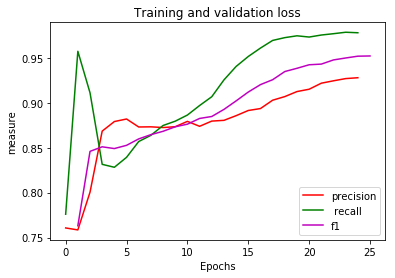

In [23]:
loss = hist.history['loss']
#val_loss = hist.history['val_loss']
precision = [x for x in hist.history['precision']]
recall = [x for x in hist.history['recall']]
f_one = [x for x in hist.history['f1']]

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
#plt.plot(loss, 'b', label='Training loss')
# b is for "solid blue line"
#plt.plot(val_loss, 'go', label='Validation loss')
plt.plot(precision, 'r', label='precision')
plt.plot(recall, 'g', label=' recall')
plt.plot(epochs, f_one, 'm', label='f1')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('measure')
plt.legend()
plt.savefig("Lstm_model_propertis.png")
plt.show()

# step 6-1: stack lstm
- LSTM1 blok=145
- LSTM2 blok=145
- batch size=200
- epoch=30
- 10-fold cross validation

# LSTM 2

Epoch 1/30
9020/9020 [==============================] - 125s 14ms/step - loss: 0.6648 - acc: 0.6214 - precision: 0.7436 - recall: 0.7511 - f1: 0.7422
Epoch 2/30
9020/9020 [==============================] - 122s 13ms/step - loss: 0.6107 - acc: 0.7309 - precision: 0.7526 - recall: 0.9539 - f1: 0.8408
Epoch 3/30
9020/9020 [==============================] - 121s 13ms/step - loss: 0.5313 - acc: 0.7664 - precision: 0.8001 - recall: 0.9232 - f1: 0.8552
Epoch 4/30
9020/9020 [==============================] - 120s 13ms/step - loss: 0.4760 - acc: 0.7875 - precision: 0.8700 - recall: 0.8422 - f1: 0.8555
Epoch 5/30
9020/9020 [==============================] - 126s 14ms/step - loss: 0.4600 - acc: 0.7876 - precision: 0.8648 - recall: 0.8491 - f1: 0.8566
Epoch 6/30
9020/9020 [==============================] - 123s 14ms/step - loss: 0.4469 - acc: 0.7968 - precision: 0.8703 - recall: 0.8562 - f1: 0.8629
Epoch 7/30
9020/9020 [==============================] - 122s 13ms/step - loss: 0.4404 - acc: 0.8029 

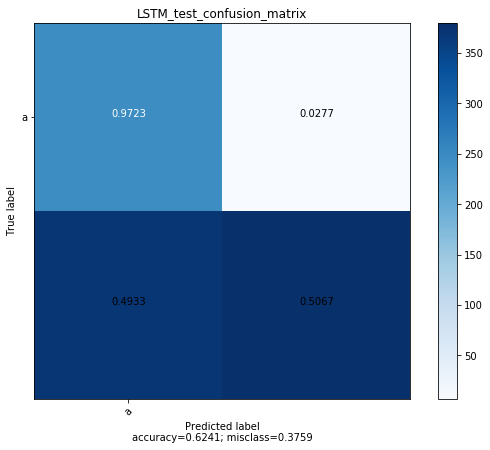

acc: 62.41%
precision: 98.26%
recall: 50.74%
f1: 66.49%
Epoch 1/30
9020/9020 [==============================] - 128s 14ms/step - loss: 0.6618 - acc: 0.6330 - precision: 0.7502 - recall: 0.7631 - f1: 0.7517
Epoch 2/30
9020/9020 [==============================] - 123s 14ms/step - loss: 0.5893 - acc: 0.7320 - precision: 0.7680 - recall: 0.9212 - f1: 0.8367
Epoch 3/30
9020/9020 [==============================] - 125s 14ms/step - loss: 0.5057 - acc: 0.7720 - precision: 0.8541 - recall: 0.8403 - f1: 0.8462
Epoch 4/30
9020/9020 [==============================] - 124s 14ms/step - loss: 0.4771 - acc: 0.7824 - precision: 0.8696 - recall: 0.8347 - f1: 0.8514
Epoch 5/30
9020/9020 [==============================] - 120s 13ms/step - loss: 0.4611 - acc: 0.7896 - precision: 0.8649 - recall: 0.8522 - f1: 0.8581
Epoch 6/30
9020/9020 [==============================] - 127s 14ms/step - loss: 0.4466 - acc: 0.7961 - precision: 0.8649 - recall: 0.8626 - f1: 0.8634
Epoch 7/30
9020/9020 [======================

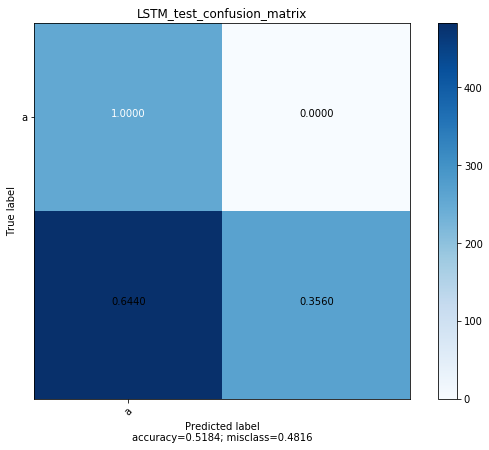

acc: 51.84%
precision: 100.00%
recall: 35.63%
f1: 51.80%
Epoch 1/30
9020/9020 [==============================] - 128s 14ms/step - loss: 0.6650 - acc: 0.6258 - precision: 0.7420 - recall: 0.7630 - f1: 0.7471
Epoch 2/30
9020/9020 [==============================] - 124s 14ms/step - loss: 0.6154 - acc: 0.7154 - precision: 0.7495 - recall: 0.9325 - f1: 0.8296
Epoch 3/30
9020/9020 [==============================] - 127s 14ms/step - loss: 0.5545 - acc: 0.7514 - precision: 0.7669 - recall: 0.9605 - f1: 0.8521
Epoch 4/30
9020/9020 [==============================] - 126s 14ms/step - loss: 0.4893 - acc: 0.7758 - precision: 0.8486 - recall: 0.8540 - f1: 0.8505
Epoch 5/30
9020/9020 [==============================] - 127s 14ms/step - loss: 0.4678 - acc: 0.7840 - precision: 0.8618 - recall: 0.8476 - f1: 0.8542
Epoch 6/30
9020/9020 [==============================] - 126s 14ms/step - loss: 0.4571 - acc: 0.7888 - precision: 0.8589 - recall: 0.8595 - f1: 0.8588
Epoch 7/30
9020/9020 [=====================

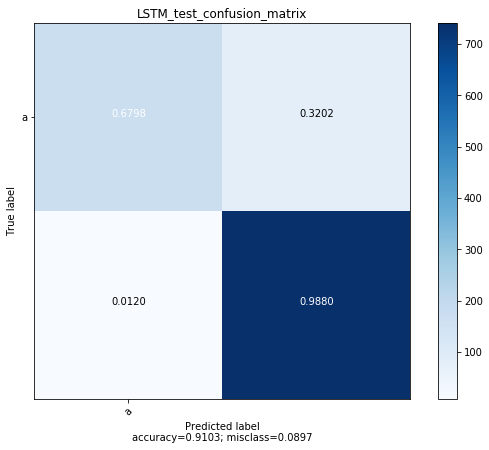

acc: 91.03%
precision: 90.14%
recall: 98.77%
f1: 94.17%
Epoch 1/30
9020/9020 [==============================] - 126s 14ms/step - loss: 0.6640 - acc: 0.6262 - precision: 0.7497 - recall: 0.7519 - f1: 0.7455
Epoch 2/30
9020/9020 [==============================] - 121s 13ms/step - loss: 0.6169 - acc: 0.7285 - precision: 0.7498 - recall: 0.9550 - f1: 0.8396
Epoch 3/30
9020/9020 [==============================] - 125s 14ms/step - loss: 0.5627 - acc: 0.7513 - precision: 0.7587 - recall: 0.9808 - f1: 0.8548
Epoch 4/30
9020/9020 [==============================] - 123s 14ms/step - loss: 0.4887 - acc: 0.7871 - precision: 0.8364 - recall: 0.8923 - f1: 0.8622
Epoch 5/30
9020/9020 [==============================] - 125s 14ms/step - loss: 0.4580 - acc: 0.7973 - precision: 0.8739 - recall: 0.8527 - f1: 0.8626
Epoch 6/30
9020/9020 [==============================] - 122s 13ms/step - loss: 0.4444 - acc: 0.8012 - precision: 0.8711 - recall: 0.8623 - f1: 0.8663
Epoch 7/30
9020/9020 [======================

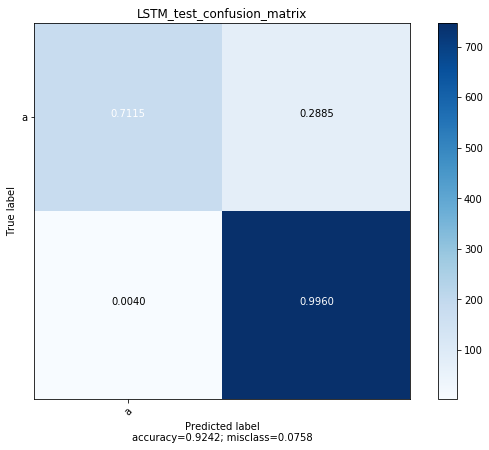

acc: 92.42%
precision: 90.98%
recall: 99.57%
f1: 94.99%
Epoch 1/30
9021/9021 [==============================] - 128s 14ms/step - loss: 0.6510 - acc: 0.6608 - precision: 0.7793 - recall: 0.7631 - f1: 0.7666
Epoch 2/30
9021/9021 [==============================] - 125s 14ms/step - loss: 0.5566 - acc: 0.7538 - precision: 0.8431 - recall: 0.8264 - f1: 0.8338
Epoch 3/30
9021/9021 [==============================] - 125s 14ms/step - loss: 0.5009 - acc: 0.7687 - precision: 0.8850 - recall: 0.7945 - f1: 0.8369
Epoch 4/30
9021/9021 [==============================] - 123s 14ms/step - loss: 0.4725 - acc: 0.7827 - precision: 0.8838 - recall: 0.8176 - f1: 0.8488
Epoch 5/30
9021/9021 [==============================] - 126s 14ms/step - loss: 0.4554 - acc: 0.7925 - precision: 0.8781 - recall: 0.8395 - f1: 0.8578
Epoch 6/30
9021/9021 [==============================] - 126s 14ms/step - loss: 0.4433 - acc: 0.7990 - precision: 0.8720 - recall: 0.8578 - f1: 0.8643
Epoch 7/30
9021/9021 [======================

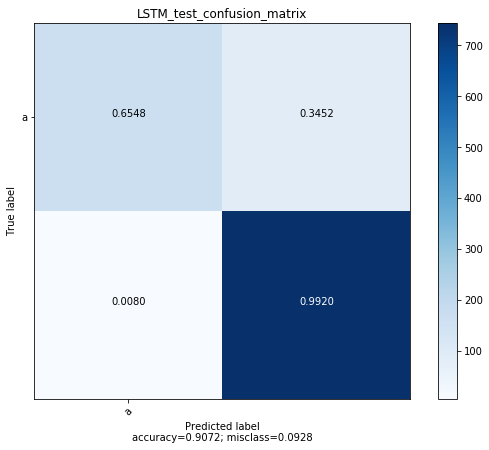

acc: 90.72%
precision: 89.45%
recall: 99.20%
f1: 93.95%
Epoch 1/30
9021/9021 [==============================] - 127s 14ms/step - loss: 0.6637 - acc: 0.6194 - precision: 0.7438 - recall: 0.7481 - f1: 0.7409
Epoch 2/30
9021/9021 [==============================] - 125s 14ms/step - loss: 0.5980 - acc: 0.7367 - precision: 0.7628 - recall: 0.9399 - f1: 0.8416
Epoch 3/30
9021/9021 [==============================] - 127s 14ms/step - loss: 0.5133 - acc: 0.7756 - precision: 0.8474 - recall: 0.8568 - f1: 0.8510
Epoch 4/30
9021/9021 [==============================] - 124s 14ms/step - loss: 0.4782 - acc: 0.7781 - precision: 0.8719 - recall: 0.8249 - f1: 0.8473
Epoch 5/30
9021/9021 [==============================] - 125s 14ms/step - loss: 0.4636 - acc: 0.7835 - precision: 0.8672 - recall: 0.8389 - f1: 0.8524
Epoch 6/30
9021/9021 [==============================] - 124s 14ms/step - loss: 0.4492 - acc: 0.7966 - precision: 0.8647 - recall: 0.8632 - f1: 0.8637
Epoch 7/30
9021/9021 [======================

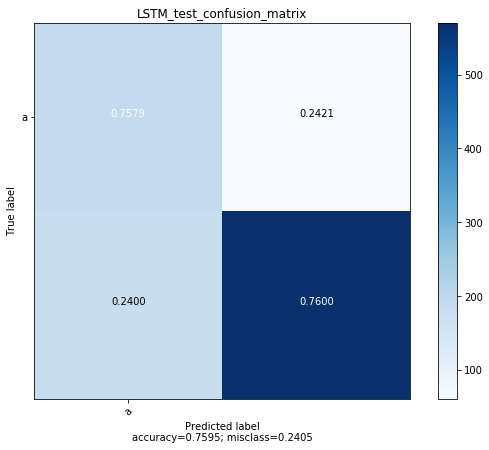

acc: 75.95%
precision: 90.40%
recall: 76.12%
f1: 82.41%
Epoch 1/30
9021/9021 [==============================] - 125s 14ms/step - loss: 0.6617 - acc: 0.6299 - precision: 0.7493 - recall: 0.7592 - f1: 0.7489
Epoch 2/30
9021/9021 [==============================] - 119s 13ms/step - loss: 0.5966 - acc: 0.7318 - precision: 0.7605 - recall: 0.9361 - f1: 0.8387
Epoch 3/30
9021/9021 [==============================] - 122s 14ms/step - loss: 0.5076 - acc: 0.7698 - precision: 0.8457 - recall: 0.8502 - f1: 0.8465
Epoch 4/30
9021/9021 [==============================] - 124s 14ms/step - loss: 0.4754 - acc: 0.7835 - precision: 0.8689 - recall: 0.8374 - f1: 0.8523
Epoch 5/30
9021/9021 [==============================] - 123s 14ms/step - loss: 0.4595 - acc: 0.7881 - precision: 0.8629 - recall: 0.8525 - f1: 0.8572
Epoch 6/30
9021/9021 [==============================] - 123s 14ms/step - loss: 0.4481 - acc: 0.7933 - precision: 0.8674 - recall: 0.8555 - f1: 0.8607
Epoch 7/30
9021/9021 [======================

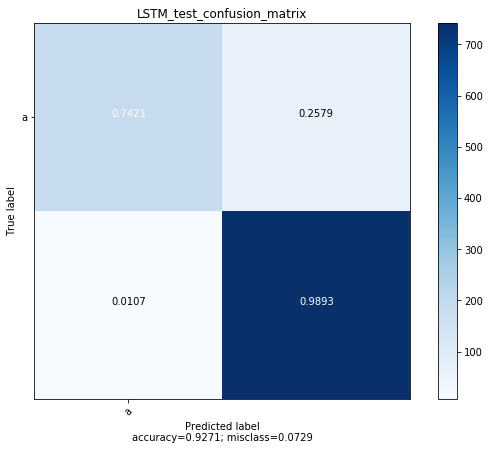

acc: 92.71%
precision: 92.11%
recall: 99.00%
f1: 95.32%
Epoch 1/30
9021/9021 [==============================] - 123s 14ms/step - loss: 0.6544 - acc: 0.6490 - precision: 0.7673 - recall: 0.7641 - f1: 0.7597
Epoch 2/30
9021/9021 [==============================] - 124s 14ms/step - loss: 0.5624 - acc: 0.7515 - precision: 0.8128 - recall: 0.8718 - f1: 0.8401
Epoch 3/30
9021/9021 [==============================] - 122s 13ms/step - loss: 0.4960 - acc: 0.7738 - precision: 0.8738 - recall: 0.8158 - f1: 0.8434
Epoch 4/30
9021/9021 [==============================] - 122s 14ms/step - loss: 0.4717 - acc: 0.7865 - precision: 0.8770 - recall: 0.8316 - f1: 0.8533
Epoch 5/30
9021/9021 [==============================] - 125s 14ms/step - loss: 0.4548 - acc: 0.7939 - precision: 0.8677 - recall: 0.8557 - f1: 0.8612
Epoch 6/30
9021/9021 [==============================] - 121s 13ms/step - loss: 0.4445 - acc: 0.7996 - precision: 0.8667 - recall: 0.8655 - f1: 0.8658
Epoch 7/30
9021/9021 [======================

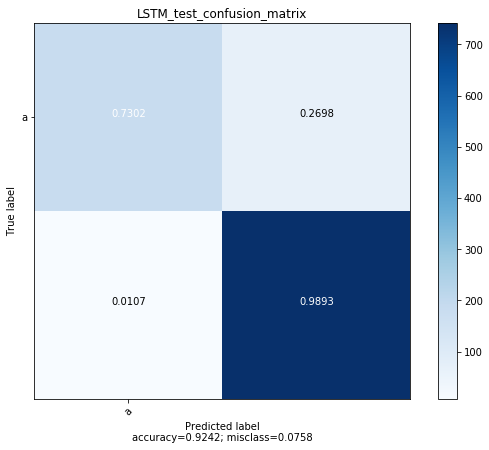

acc: 92.42%
precision: 91.53%
recall: 98.93%
f1: 95.00%
Epoch 1/30
9021/9021 [==============================] - 126s 14ms/step - loss: 0.6649 - acc: 0.6224 - precision: 0.7405 - recall: 0.7628 - f1: 0.7464
Epoch 2/30
9021/9021 [==============================] - 121s 13ms/step - loss: 0.6133 - acc: 0.7352 - precision: 0.7509 - recall: 0.9676 - f1: 0.8449
Epoch 3/30
9021/9021 [==============================] - 122s 13ms/step - loss: 0.5421 - acc: 0.7524 - precision: 0.7836 - recall: 0.9280 - f1: 0.8483
Epoch 4/30
9021/9021 [==============================] - 122s 14ms/step - loss: 0.4838 - acc: 0.7792 - precision: 0.8657 - recall: 0.8347 - f1: 0.8493
Epoch 5/30
9021/9021 [==============================] - 124s 14ms/step - loss: 0.4670 - acc: 0.7861 - precision: 0.8661 - recall: 0.8445 - f1: 0.8548
Epoch 6/30
9021/9021 [==============================] - 121s 13ms/step - loss: 0.4548 - acc: 0.7940 - precision: 0.8656 - recall: 0.8582 - f1: 0.8615
Epoch 7/30
9021/9021 [======================

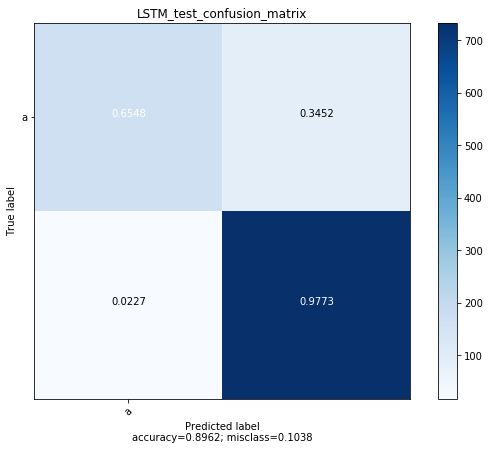

acc: 89.62%
precision: 89.55%
recall: 97.73%
f1: 93.33%
Epoch 1/30
9022/9022 [==============================] - 124s 14ms/step - loss: 0.6624 - acc: 0.6327 - precision: 0.7550 - recall: 0.7512 - f1: 0.7480
Epoch 2/30
9022/9022 [==============================] - 123s 14ms/step - loss: 0.6044 - acc: 0.7348 - precision: 0.7533 - recall: 0.9606 - f1: 0.8437
Epoch 3/30
9022/9022 [==============================] - 119s 13ms/step - loss: 0.5310 - acc: 0.7631 - precision: 0.8029 - recall: 0.9105 - f1: 0.8516
Epoch 4/30
9022/9022 [==============================] - 121s 13ms/step - loss: 0.4825 - acc: 0.7769 - precision: 0.8601 - recall: 0.8389 - f1: 0.8489
Epoch 5/30
9022/9022 [==============================] - 123s 14ms/step - loss: 0.4666 - acc: 0.7832 - precision: 0.8612 - recall: 0.8473 - f1: 0.8537
Epoch 6/30
9022/9022 [==============================] - 121s 13ms/step - loss: 0.4550 - acc: 0.7936 - precision: 0.8644 - recall: 0.8597 - f1: 0.8616
Epoch 7/30
9022/9022 [======================

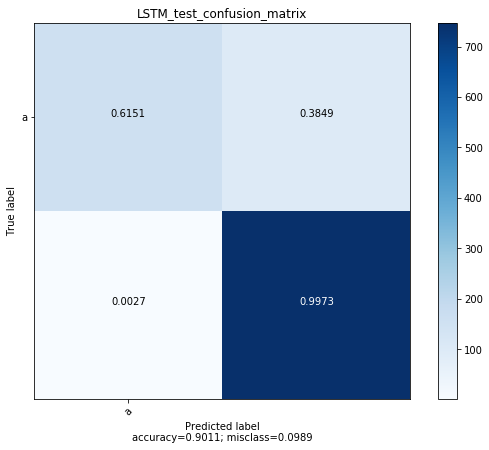

acc: 90.11%
precision: 88.67%
recall: 99.75%
f1: 93.76%
82.92% (+/- 13.91%)
92.11% (+/- 3.66%)
85.54% (+/- 22.50%)
86.12% (+/- 14.34%)


In [18]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
cvscores2=[]
cvscores3=[]
cvscores4=[]
    
from keras import optimizers
lstm_out = 100
Y = data['class'].values
for train, test in kfold.split(X, Y):
    model = Sequential()
    model.add(Embedding(max_fatures,1,input_length = X.shape[1]))
    model.add(LSTM(145, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(145, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(keras.layers.BatchNormalization())
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy',precision,recall,f1])
    hist2=model.fit(X[train], Y[train], epochs=30, batch_size=200, verbose=1)
    scores = model.predict(X[test])
    cm = confusion_matrix(Y[test], scores.round())
    print(cm)
    plot_confusion_matrix(cm,
                          target_names='a',
                          title='LSTM_test_confusion_matrix',
                          cmap=None,
                          normalize=True)
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
    print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
    print("%s: %.2f%%" % (model.metrics_names[4], scores[4]*100))
    cvscores.append(scores[1] * 100)
    cvscores2.append(scores[2] * 100)
    cvscores3.append(scores[3] * 100)
    cvscores4.append(scores[4] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores2), numpy.std(cvscores2)))
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores3), numpy.std(cvscores3)))
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores4), numpy.std(cvscores4)))

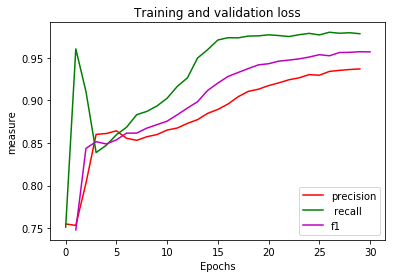

In [24]:
loss = hist2.history['loss']
#val_loss = hist.history['val_loss']
precision = [x for x in hist2.history['precision']]
recall = [x for x in hist2.history['recall']]
f_one = [x for x in hist2.history['f1']]

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
#plt.plot(loss, 'b', label='Training loss')
# b is for "solid blue line"
#plt.plot(val_loss, 'go', label='Validation loss')
plt.plot(precision, 'r', label='precision')
plt.plot(recall, 'g', label=' recall')
plt.plot(epochs, f_one, 'm', label='f1')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('measure')
plt.legend()
plt.savefig("Lstm_model_propertis.png")
plt.show()

# Report

-  <font color='green'> LSTM1 accuracy after 10 fold          CV: 86.99  </font>
- <font color='green'>LSTM1 precision after 10 fold           CV: 95.91 </font> 
- <font color='green'>LSTM1 recall after 10 fold              CV:89.42 </font> 
- <font color='green'>LSTM1 f1 after 10 fold                  CV: 90.72 </font> 
-----------------------------------------------------------------------------------------
- <font color='red'>LSTM2 accuracy after 10 fold              CV:84.34 </font> 
- <font color='red'>LSTM2 precision after 10 fold             CV: 87.02 </font> 
- <font color='red'>LSTM2 recall after 10 fold                CV:85.95 </font> 
- <font color='red'>LSTM2 f1 after 10 fold                    CV: 90.0 </font> 

-----------------------------------------------------------------------------------------
- <font color='red'>Random Forest accuracy after 10 fold      CV: 0.86 </font>
- <font color='red'>Random Forest precision after 10 fold     CV: 0.91 </font> 
- <font color='red'>Random Forest recall after 10 fold        CV: 0.89 </font> 
- <font color='red'>Random Forest f1 after 10 fold            CV: 0.90 </font> 
------------------------------------------------------------
 - <font color='red'> SVM accuracy after 10 fold              CV:0.65 </font> 
 - <font color='red'>SVM precision after 10 fold              CV: 0.82 </font> 
 - <font color='red'>SVM recall after 10 fold                 CV: 0.78</font>  
 - <font color='red'>SVM f1 after 10 fold                     CV: 0.77</font>  
------------------------------------------------------------
 - <font color='red'>Decision Tree accuracy after 10 fold     CV: 0.83 </font> 
 - <font color='red'>Decision Tree precision after 10 fold    CV: 0.89</font> 
 - <font color='red'> Decision Tree recall after 10 fold      CV:0.87 </font> 
 - <font color='red'>Decision Tree f1 after 10 fold           CV: 0.88 </font> 
------------------------------------------------------------
 - <font color='red'>Nive Bayes accuracy after 10 fold        CV: 0.78 </font> 
 - <font color='red'>Nive Bayes precision after 10 fold       CV: 0.86 </font> 
 - <font color='red'>Nive Bayes recall after 10 fold          CV: 0.85</font>  
 - <font color='red'>Nive Bayes f1 after 10 fold              CV: 0.85</font>  
------------------------------------------------------------
 - <font color='red'>K Neighbors accuracy after 10 fold       CV: 0.80</font>  
 - <font color='red'> K Neighbors precision after 10 fold     CV:0.84 </font> 
 - <font color='red'>K Neighbors recall after 10 fold         CV: 0.89</font>  
 - <font color='red'>K Neighbors f1 after 10 fold             CV: 0.87</font>  
------------------------------------------------------------
